In [1]:
import torch
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T
import cv2

C:\Users\Rew\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


In [2]:
data = np.load("alltanks.npy")

In [3]:
cv2.imshow('image',data[11])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


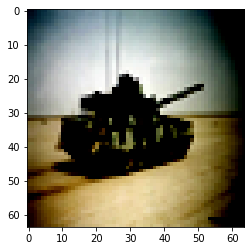

In [4]:
plt.imshow(data[11])

In [5]:
img_array = data[11]

In [6]:
data[111].T

array([[[ 0.01176471,  0.01176471,  0.01960784, ...,  0.01960784,
         -0.12156863, -0.16862745],
        [ 0.01176471,  0.01176471,  0.02745098, ..., -0.00392157,
         -0.20784314, -0.14509804],
        [ 0.01176471,  0.01176471,  0.02745098, ..., -0.16862745,
         -0.38823529, -0.31764706],
        ...,
        [-0.00392157,  0.01176471,  0.01176471, ..., -0.01960784,
          0.10588235, -0.23921569],
        [-0.01176471,  0.00392157,  0.01176471, ..., -0.05098039,
          0.11372549, -0.21568627],
        [-0.00392157,  0.01176471,  0.01176471, ..., -0.15294118,
         -0.12156863, -0.20784314]],

       [[ 0.42745098,  0.42745098,  0.42745098, ..., -0.08235294,
         -0.17647059, -0.23137255],
        [ 0.42745098,  0.42745098,  0.43529412, ..., -0.10588235,
         -0.23921569, -0.21568627],
        [ 0.42745098,  0.42745098,  0.43529412, ..., -0.2       ,
         -0.31764706, -0.31764706],
        ...,
        [ 0.42745098,  0.42745098,  0.42745098, ..., -

In [7]:
data.shape

(1079, 64, 64, 3)

In [8]:
img_tensor = T.ToTensor()(img_array)

img = T.ToPILImage()(img_tensor)

img.show()

In [21]:
class TanksDataset(Dataset):

    def __init__(self):
        
        path = "alltanks.npy"

        images_data = np.load(path)

        data = np.swapaxes(images_data, 3, 1)

        self.data = data
    
    def __getitem__(self, index):

        return self.data[index]

    def __len__(self):
        
        return len(self.data)

In [22]:
train_loader = DataLoader(TanksDataset(), batch_size=1, shuffle=True)

In [24]:
dataiter = iter(train_loader)

batch = dataiter.next()

print(batch)

tensor([[[[ 0.3176,  0.3333,  0.3333,  ...,  0.0196, -0.0118, -0.0353],
          [ 0.3255,  0.3490,  0.3569,  ...,  0.0039, -0.0196, -0.0196],
          [ 0.4118,  0.4196,  0.4353,  ..., -0.0196, -0.0118, -0.0118],
          ...,
          [ 0.3647,  0.3725,  0.3804,  ...,  0.0196, -0.2314, -0.0353],
          [ 0.3647,  0.3725,  0.3804,  ...,  0.0118, -0.2706, -0.0039],
          [ 0.3569,  0.3725,  0.3804,  ...,  0.0275, -0.0824,  0.0118]],

         [[ 0.4353,  0.4431,  0.4510,  ...,  0.0275, -0.0039, -0.0275],
          [ 0.4431,  0.4510,  0.4667,  ...,  0.0118, -0.0118, -0.0118],
          [ 0.4824,  0.4667,  0.4902,  ..., -0.0118, -0.0039, -0.0039],
          ...,
          [ 0.4902,  0.4980,  0.5059,  ...,  0.0275, -0.2235, -0.0275],
          [ 0.4902,  0.4980,  0.5059,  ...,  0.0118, -0.2784, -0.0039],
          [ 0.4824,  0.4980,  0.5059,  ...,  0.0275, -0.0824,  0.0118]],

         [[ 0.6392,  0.6549,  0.6706,  ..., -0.0275, -0.0510, -0.0745],
          [ 0.6392,  0.6627,  